# 📝 Exercise M1.01

Imagine we are interested in predicting penguins species based on two of their
body measurements: culmen length and culmen depth. First we want to do some
data exploration to get a feel for the data.

What are the features? What is the target?

$ \rightarrow$ the features are the culmen lenght and the culmen depth

$ \rightarrow$ the target is the species

The data is located in `../datasets/penguins_classification.csv`, load it with
`pandas` into a `DataFrame`.

In [20]:
# Write your code here.
import pandas as pd
url = 'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/datasets/penguins_classification.csv'
penguins = pd.read_csv(url)


Show a few samples of the data.

How many features are numerical? How many features are categorical?

$ \rightarrow$ the numerical features are the culmen lenght and the culmen depth

$ \rightarrow$ there is no categorical column

In [22]:
print(f"The dataset contains {penguins.shape[1] - 1} features.")
penguins.info()

The dataset contains 2 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Culmen Length (mm)  342 non-null    float64
 1   Culmen Depth (mm)   342 non-null    float64
 2   Species             342 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.1+ KB


In [21]:
# Write your code here.
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie


What are the different penguins species available in the dataset and how many
samples of each species are there? Hint: select the right column and use the
[`value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
method.

In [24]:
# Write your code here.
target = "Species"
penguins[target].value_counts()


Species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

Plot histograms for the numerical features

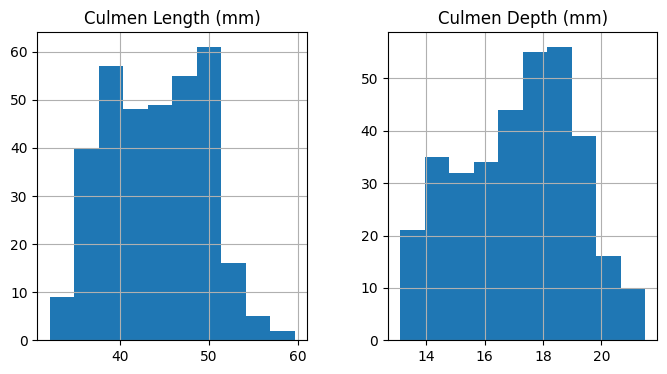

In [26]:
# Write your code here.
import matplotlib.pyplot as plt
_ = penguins.hist(figsize=(8, 4))


Show features distribution for each class. Hint: use
[`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

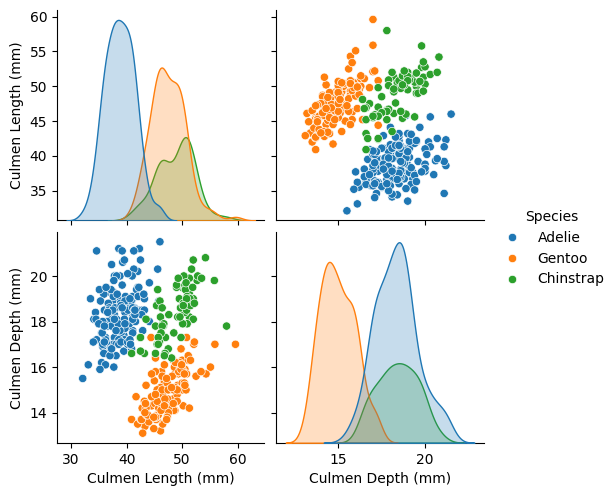

In [28]:
# Write your code here.
import seaborn as sns
pairplot_figure = sns.pairplot(penguins, hue=target)

Looking at these distributions, how hard do you think it would be to classify
the penguins only using `"culmen depth"` and `"culmen length"`?

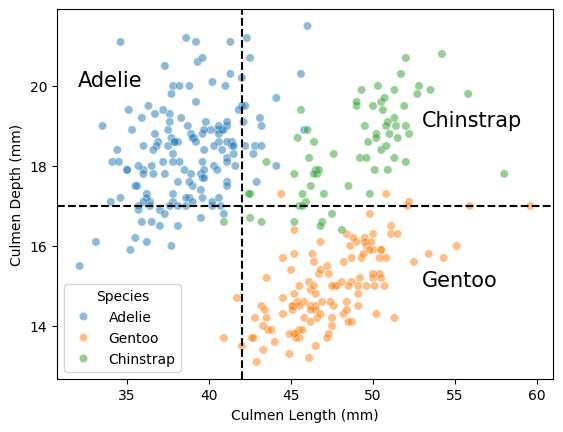

In [52]:
ax = sns.scatterplot(
    x="Culmen Length (mm)",
    y="Culmen Depth (mm)",
    data=penguins,
    hue=target,
    alpha=0.5,
)
depth = 42
plt.axvline(x=depth, ymin=0, ymax=1, color="black", linestyle="--")

lenght = 17
plt.axhline(
    y=lenght, xmin=0, xmax=1, color="black", linestyle="--"
)
plt.annotate("Adelie", (32, 20), fontsize=15)
plt.annotate("Gentoo", (53, 15), fontsize=15)
_ = plt.annotate("Chinstrap", (53, 19), fontsize=15)

We can easily classify the penguins species
- low culmen lenght $\rightarrow$ Adelie
- high culmen lenght $\rightarrow$ Gentoo
- high culmen lenght + high culmen depth $\rightarrow$ Chinstrap
There is some small overlap between the species, so we can expect a statistical model to perform well on the dataset but not perfectly
